# La búsqueda de información en las calles del municipio Plaza de la Revolución no fue fácil, pero me ayudó a crecer como estudiante. Después de caminar varios días buscando agros y cafeterías, de soportar los malos tratos de los dueños de los lugares ya que no entendían nuestra investigación, pude llegar a la recopilación de los siguientes datos.


# Para importar la librería necesaria, simplemente utilicé la declaración 'import' seguida del nombre de la librería.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import json


# Cargué los datos del .json

In [2]:
with open('CD_dataBase001.json', 'r') as file:
    # Load JSON data from file
    data = json.load(file)
    

# Crear las listas que usaré para los datos de la cerveza 

In [3]:
cer_names = []
cer_prices = []
cer_loc = []

cer_marcas = []
cer_country = []
cer_ml = []
cer_cont_alc = []

cer_names_num = {}
cer_loc_num = {}
names_index=1
loc_index=1
cer_names2 = []
cer_loc2 = []

cer_countries = {}
cer_cnames = []
cer_cfreq = []
cer_prices_sum = []
cer_prices_ocurrences = []
cer_ave = []

# Iniciar los datos de la cerveza dentro del .json

In [4]:
for cer in data["cerveza"]:
    if cer["marca"] != None and cer["precio"] != None and cer["loc"] != None:
        cer_names.append(cer["marca"])
        a = cer["loc"][0]
        b = cer["loc"][1]
        cer_loc.append(str(a) + str(b))
        if type(cer["precio"]) == type([1,2,3]):
            cer_prices.append(cer["precio"][0])
        else:
            cer_prices.append(cer["precio"])
    
    if cer["marca"] not in cer_marcas:
        if(cer["marca"] != None )and (cer["pais_de_procedencia"] != None )and (cer["volumen_de_alcohol_en_%"] != None) and (cer["contenido_ml"] != None):
            cer_marcas.append(cer["marca"])
            cer_country.append(cer["pais_de_procedencia"])
            cer_cont_alc.append(cer["volumen_de_alcohol_en_%"])
            cer_ml.append(cer["contenido_ml"])

for i in range(len(cer_names)):
    name = cer_names[i]
    loc = cer_loc[i]
    if name not in cer_names_num:
        cer_names_num[name]=names_index
        names_index+=1
        
    if loc not in cer_loc_num:
        cer_loc_num[loc]=loc_index
        loc_index+=1
        
    cer_names2.append(cer_names_num[name])
    cer_loc2.append(cer_loc_num[loc])

for cer in data["cerveza"]:
    if cer["pais_de_procedencia"] in cer_countries:
        cer_countries[cer["pais_de_procedencia"]] += 1
    else:
        cer_countries[cer["pais_de_procedencia"]] = 1

for i in cer_countries:
    if (i != None):
        cer_cnames.append(i)
        cer_cfreq.append(cer_countries[i])

for i in range(len(cer_names)):
    cer_prices_sum.append(0)
    cer_prices_ocurrences.append(0)
    

for i in range(len(cer_names)):
    name = cer_names[i]
    price = cer_prices[i]
    
    index_name = cer_names_num[name]
    cer_prices_sum[index_name]+=price
    cer_prices_ocurrences[index_name]+=1

for i in cer_names_num:
    cer_ave.append(cer_prices_sum[cer_names_num[i]]/cer_prices_ocurrences[cer_names_num[i]])

# La cerveza tiene aproximadamente 5% de alcohol, aunque algunas tienen más. Analizar el % de alcohol resulta el principal control de calidad y estabilidad de las bebidas. En la recopilación de la información pude observar como las personas se fijaban demasiado en el % de alcohol de las cervezas antes de comprarla, por eso graficaremos el % de alcohol en cada marca para facilitar la búsqueda de este dato.

Text(0.5, 1.0, 'Porciento de alcohol en cada marca')

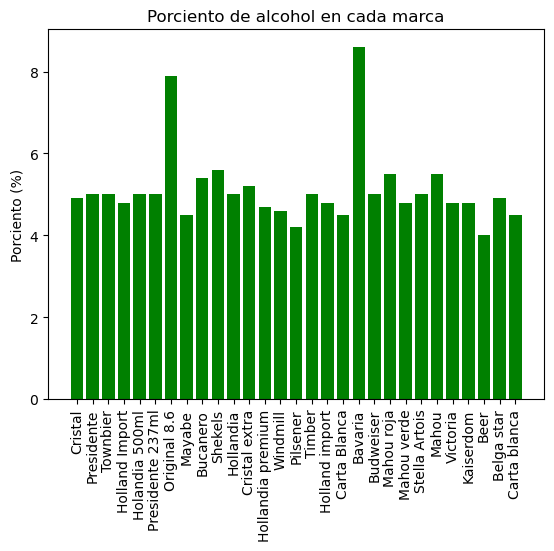

In [5]:
fig, ax = plt.subplots()
ax.bar(cer_marcas,cer_cont_alc, color='green')
plt.xticks(rotation=90)

ax.set_ylabel('Porciento (%)')
ax.set_title ('Porciento de alcohol en cada marca')

# Graficar el contenido en ml de cada marca de cerveza es útil por varias razones, saber la cantidad exacta de ml de una cerveza te permite tener un mejor control sobre tu consumo. Si estas tratando de moderar la cantidad de alcohol que consumes, conocer la cantidad precisa te ayuda a establecer límites y controlar la ingesta. AL conocer el contenido en ml de una cerveza, puedes estimar el número de calorías que estás consumiendo, es especialmente útil si estás siguiendo una dieta o quieres controlar tu ingesta calórica.

Text(0, 0.5, 'Mililitros (ML)')

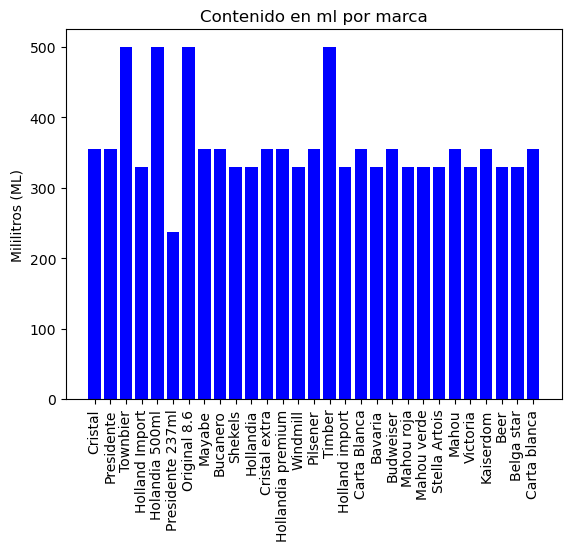

In [6]:
fig, ax = plt.subplots()
ax.bar(cer_marcas,cer_ml, color='blue')
plt.xticks(rotation=90)

ax.set_title ('Contenido en ml por marca')
ax.set_ylabel('Mililitros (ML)')

# Al visualizar las estadísticas de la cantidad de marcas de cerveza por países, puedes obtener una idea de la variedad de opciones disponibles en diferentes regiones. Esto te permite explorar diferentes estilos de cerveza, sabores y perfiles de sabor que podrían ser de tu interés. Al analizar las estadísticas, puedes identificar las marcas de cerveza más populares en cada país. Esto te brinda información sobre las preferencias de los consumidores y las tendencias actuales en la industria cervecera 

Text(0.5, 1.0, 'Paises de procedencia de la cerveza')

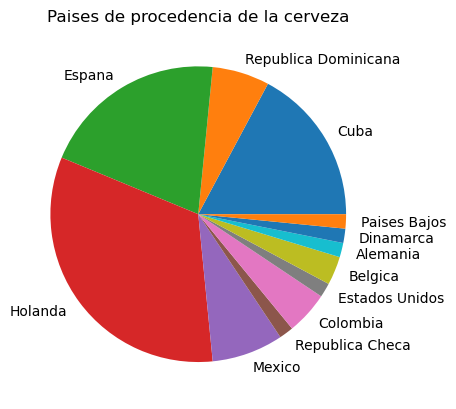

In [7]:
fig, ax = plt.subplots()

#ax.bar(cer_cnames, cer_cfreq, color='green')
#plt.xticks(rotation=90)
plt.pie(cer_cfreq, labels= cer_cnames)
ax.set_title('Paises de procedencia de la cerveza')


# Analizar el promedio de precios de las diferentes marcas de cerveza te brinda el conocimiento para ajustar tu presupuesto y tomar decisiones informadas al momento de comprar. Si tienes un presupuesto limitado, puedes optar por marcas más económicas. Por otro lado, si estás dispuesto a gastar un poco más, puedes elegir marcas de mayor calidad o con características específicas que te interesen. Analizar el promedio de precios también te ayuda a evaluar la relación entre la calidad y el precio de cada marca, puedes comparar los precios con la reputación y la satisfacción general de los consumidores para determinar si una marca en particular ofrece un buen valor por el dinero que pagas.

Text(0, 0.5, 'Precio Promedio')

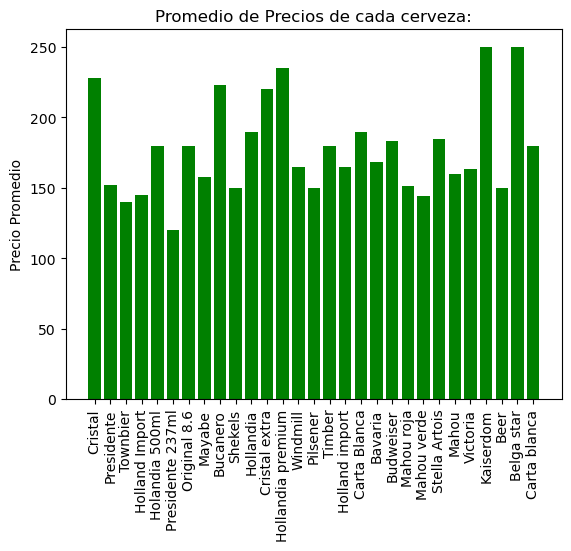

In [8]:
fig, ax = plt.subplots()
ax.bar(cer_marcas,cer_ave, color='green')
plt.xticks(rotation=90)

ax.set_title ('Promedio de Precios de cada cerveza:')
ax.set_ylabel('Precio Promedio')

# Inicializar las variables que usaré para los datos de la cebolla

In [9]:
ceb_names = []
ceb_types = []
ceb_prices = []
ceb_loc = []
ceb_ave = {}
ceb_freq = {}

# Iniciar los datos de la cebolla dentro del json

In [10]:
for ceb in data["cebolla"]:
    if ceb["tipo"] != None and ceb["precio"] != None and ceb["loc"] != None:
        ceb_names.append(ceb["tipo"])
        a = ceb["loc"][0]
        b = ceb["loc"][1]
        ceb_loc.append(str(a) + str(b))
    
    if(ceb["tipo"] != None):
        if ceb["tipo"] not in ceb_freq:
            ceb_freq[ceb["tipo"]] = 0
            ceb_ave[ceb["tipo"]] = 0
        
        if type(ceb["precio"]) == type([]):
            for value in ceb["precio"]:
                ceb_freq[ceb["tipo"]] += 1
                ceb_ave[ceb["tipo"]] += value
        else:
            ceb_freq[ceb["tipo"]] += 1
            ceb_ave[ceb["tipo"]] += ceb["precio"]
    
for i in ceb_ave:
    ceb_ave[i] /= ceb_freq[i]

for i in ceb_ave:
    if (i == None):
        continue
    ceb_types.append(i)
    ceb_prices.append(ceb_ave[i])

# Graficar el promedio de precios de la cebolla puede proporcionar información valiosa sobre su costo en el mercado, esto te permite planificar tus compras de manera más efectiva. Visualizar el promedio de precios de la cebolla te permite comparar los precios de diferentes establecimientos o proveedores. Puedes identificar dónde puedes encontrar la cebolla a un precio más competitivo y tomar decisiones en función de tus necesidades y preferencias. 

Text(0, 0.5, 'Precio Promedio')

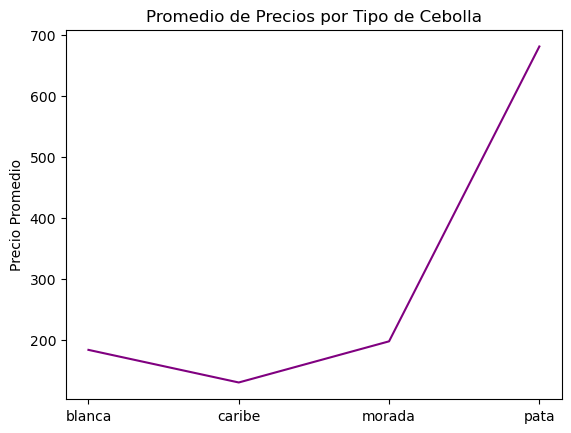

In [11]:
fig, ax = plt.subplots()
ax.plot(ceb_types,ceb_prices, color='purple')

ax.set_title ('Promedio de Precios por Tipo de Cebolla')
ax.set_ylabel('Precio Promedio')

# Crear las listas que usaré para los datos de la malta

In [12]:
mal_names = []
mal_prices = []
mal_loc = []
mal_marcas = []
mal_ml = []
mal_country = []

mal_countries = {}
mal_cnames = []
mal_cfreq = []

mal_names_num = {}
mal_loc_num = {}
names_index=1
loc_index=1
mal_names2 = []
mal_loc2 = []

mal_prices_sum = []
mal_prices_ocurrences = []
mal_ave = []

mal_names_num = {}
mal_loc_num = {}
names_index=1
loc_index=1
mal_names2 = []
mal_loc2 = []

# Iniciar los datos de la malta dentro del .json

In [13]:
for mal in data["malta"]:
    if mal["marca"] != None and mal["precio"] != None and mal["loc"] != None:
        mal_names.append(mal["marca"])
        a = mal["loc"][0]
        b = mal["loc"][1]
        mal_loc.append(str(a) + str(b))
        if type(mal["precio"]) == type([1,2,3]):
            mal_prices.append(mal["precio"][0])
        else:
            mal_prices.append(mal["precio"])
    
    if mal["marca"] not in mal_marcas:
        if(mal["marca"] != None) and (mal["contenido_ml"] != None) and (mal["pais de procedencia"] != None):            
            mal_country.append(mal["pais de procedencia"])
            mal_marcas.append(mal["marca"])
            mal_ml.append(mal["contenido_ml"])

for i in range(len(mal_names)):
    name = mal_names[i]
    loc = mal_loc[i]
    if name not in mal_names_num:
        mal_names_num[name]=names_index
        names_index+=1
        
    if loc not in mal_loc_num:
        mal_loc_num[loc]=loc_index
        loc_index+=1
        
    mal_names2.append(mal_names_num[name])
    mal_loc2.append(mal_loc_num[loc])

for mal in data["malta"]:
    if mal["pais de procedencia"] in mal_countries:
        mal_countries[mal["pais de procedencia"]] += 1
    else:
        mal_countries[mal["pais de procedencia"]] = 1

for i in mal_countries:
    if (i != None):
        mal_cnames.append(i)
        mal_cfreq.append(cer_countries[i])

for i in range(len(mal_names)):
    mal_prices_sum.append(0)
    mal_prices_ocurrences.append(0)    

for i in range(len(mal_names)):
    name = mal_names[i]
    price = mal_prices[i]

    
    index_name = mal_names_num[name]
    mal_prices_sum[index_name]+=price
    mal_prices_ocurrences[index_name]+=1

for i in mal_names_num:
    mal_ave.append(mal_prices_sum[mal_names_num[i]]/mal_prices_ocurrences[mal_names_num[i]])

# Al graficar el contenido en ml de cada malta, puedes comparar diferentes marcas y lotes para evaluar la consistencia en la cantidad de malta proporcionada.

Text(0, 0.5, 'Mililitros (ML)')

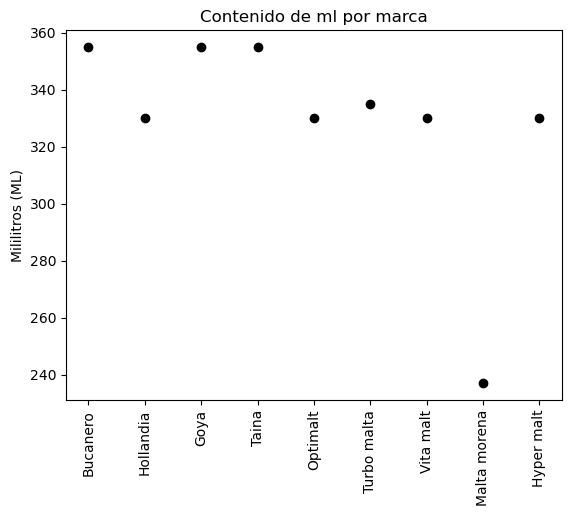

In [14]:
fig, ax = plt.subplots()
ax.scatter(mal_marcas,mal_ml,color='black')
plt.xticks(rotation=90)

ax.set_title ('Contenido de ml por marca')
ax.set_ylabel('Mililitros (ML)')

# Al graficar las estadísticas de la cantidad de marcas de malta por países puedes tener una idea de la diversidad de opciones que existen, esto te permite explorar diferentes sabores, estilos y perfiles de malta.

Text(0.5, 1.0, 'Paises de procedencia de la Malta')

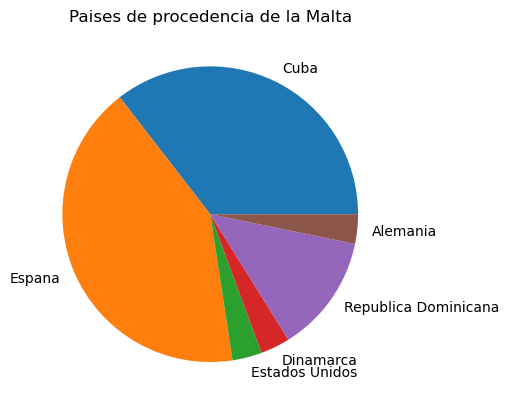

In [21]:
fig, ax = plt.subplots()

#ax.bar(mal_cnames, mal_cfreq, color='orange')
#plt.xticks(rotation=90)
plt.pie(mal_cfreq, labels= mal_cnames)

ax.set_title('Paises de procedencia de la Malta')


# Al graficar el promedio de precios por cada marca de malta, puedes tener una idea clara de cuánto podrías gastar en tu compra de malta. Hacer este análisis te permite realizar comparaciones y evaluar las opciones disponibles en el mercado, puedes identificar marcas de malta que ofrecen una buena relación calidad-precio y descubrir si una marca en particular se considera más cara o más asequible en comparación con otras.

Text(0, 0.5, 'Precio Promedio')

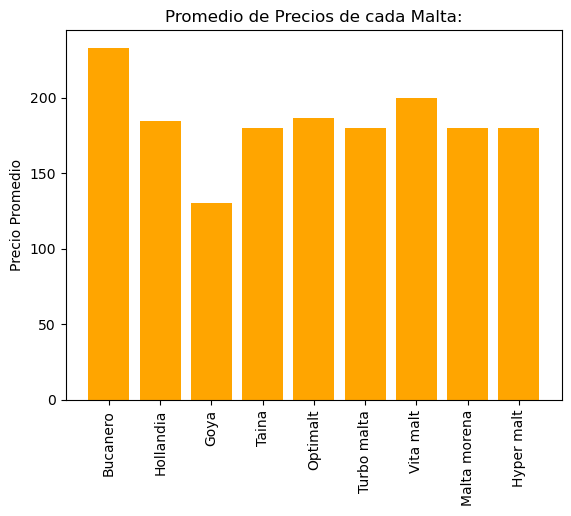

In [16]:
fig, ax = plt.subplots()
ax.bar(mal_marcas,mal_ave, color='orange')
plt.xticks(rotation=90)

ax.set_title ('Promedio de Precios de cada Malta:')
ax.set_ylabel('Precio Promedio')

# Según el Ministerio de Trabajo y Seguridad Social, el salario mínimo en cuba es de 2100 pesos y el máximo es de 9800, al restarle la canasta básica que es de 1528, se calculó la cantidad de cervezas que puede comprar en el mes una persona con salario mínimo y otra con salario máximo si compran la cerveza más barata.

In [17]:
salario_minimo = 2100
salario_maximo = 9800
canasta_basica = 1528

salario_maximo -= canasta_basica
salario_minimo -= canasta_basica

min_price = 1000
for pr in cer_prices:
    min_price = min(min_price, pr)

print(salario_minimo // min_price)
print(salario_maximo // min_price)

4
68


# La realización de este proyecto hizo que me diera cuenta de cuanto me apasiona mi carrera.